In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [3]:
import zipfile
import io
zf = zipfile.ZipFile('/content/Bus-Sekolah.zip', "r")
zf.extractall()


In [4]:
def getDf():
  months = ['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus']
  dfs = []
  i = 1
  for month in months:
        basepath = '/content/data-penumpang-bus-sekolah-bulan-'+month+'.csv'
        df = pd.read_csv(basepath, encoding='cp1252')        
        df['bulan'] = i
        dfs.append(df)
        i = i+1
        print(basepath)
  return pd.concat(dfs)

In [5]:
dfs = getDf()

/content/data-penumpang-bus-sekolah-bulan-januari.csv
/content/data-penumpang-bus-sekolah-bulan-februari.csv
/content/data-penumpang-bus-sekolah-bulan-maret.csv
/content/data-penumpang-bus-sekolah-bulan-april.csv
/content/data-penumpang-bus-sekolah-bulan-mei.csv
/content/data-penumpang-bus-sekolah-bulan-juni.csv
/content/data-penumpang-bus-sekolah-bulan-juli.csv
/content/data-penumpang-bus-sekolah-bulan-agustus.csv


In [6]:
dfs.isnull().sum()

type_operasi          0
area_operasi          0
jumlah_bus          210
jumlah_penumpang    211
bulan                 0
dtype: int64

In [7]:
dfs = dfs.dropna(axis = 0)
dfs.isnull().sum()

type_operasi        0
area_operasi        0
jumlah_bus          0
jumlah_penumpang    0
bulan               0
dtype: int64

In [8]:
dfs

,type_operasi,area_operasi,jumlah_bus,jumlah_penumpang,bulan
0,RSUD CENGKARENG,JAKARTA,125.0,5203.0,1
2,RSUD CENGKARENG,DEPOK,30.0,692.0,1
3,RSUD CENGKARENG,TANGERANG,70.0,1232.0,1
4,RSUD CENGKARENG,BEKASI,24.0,233.0,1
5,RSUD DUREN SAWIT,JAKARTA,95.0,4887.0,1
...,...,...,...,...,...
278,RUTE ZONASI,ZONASI 9 (ROROTAN - MARUNDA),32.0,2.0,8
279,RUTE ZONASI,ZONASI 10 (RUSUNAWA - CILINCING),2.0,2.0,8
280,RUTE ZONASI,ZONASI 11 (RUSUN KAPUK MUARA - JEMBATAN LIMA -...,5.0,2.0,8
281,RUTE ZONASI,ZONASI 12 (RUSUN RAWABEBEK - CAKUNG TIMUR - RO...,7.0,2.0,8


## Distribusi Data

In [175]:
dfs2 = dfs[dfs['jumlah_bus']> 0]

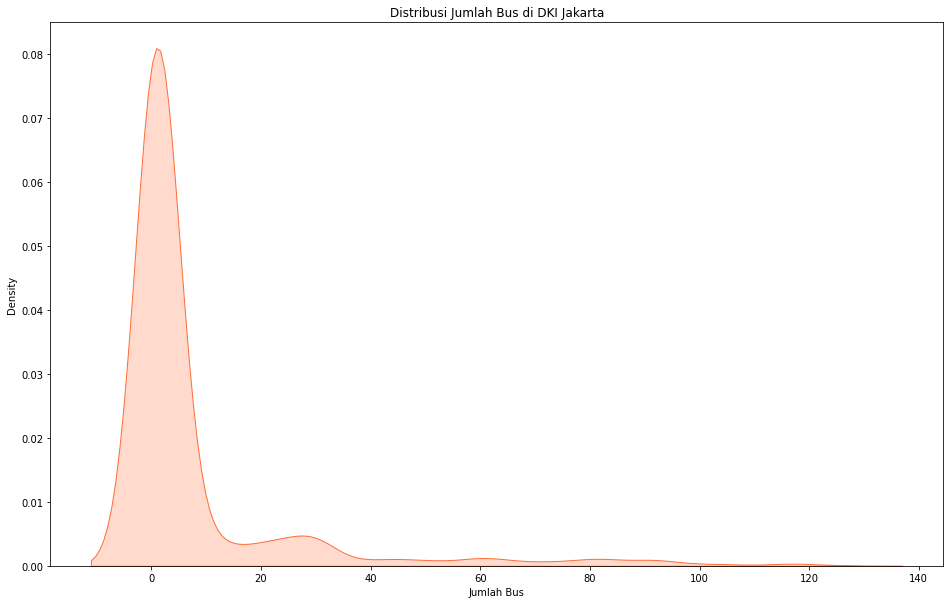

In [176]:
plt.figure(figsize = (16, 10))
sns.kdeplot(data = dfs2['jumlah_bus'], shade = True)
plt.title('Distribusi Jumlah Bus di DKI Jakarta')
plt.xlabel('Jumlah Bus')
plt.show()

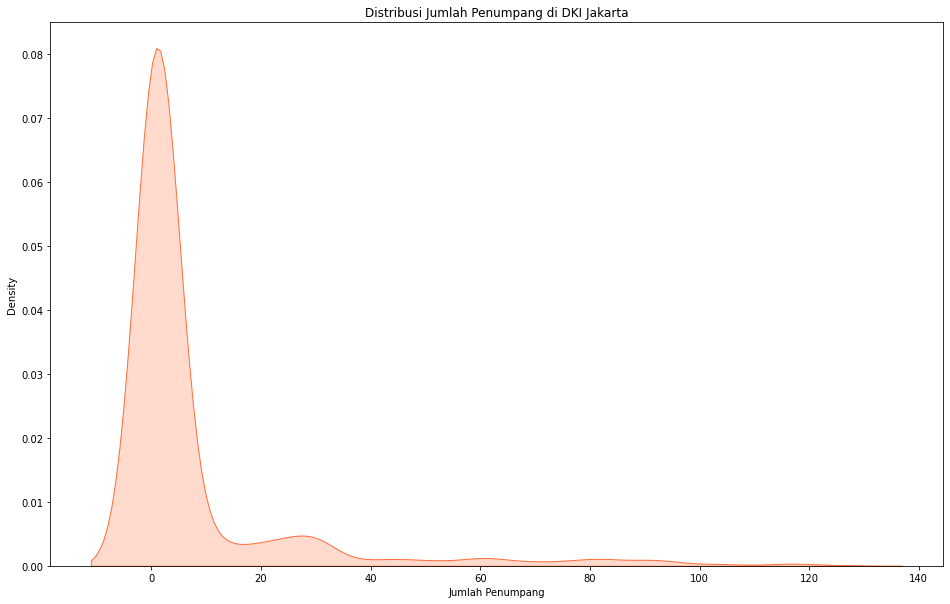

In [177]:
plt.figure(figsize = (16, 10))
sns.kdeplot(data = dfs2['jumlah_bus'], shade = True)
plt.title('Distribusi Jumlah Penumpang di DKI Jakarta')
plt.xlabel('Jumlah Penumpang')
plt.show()

Berdasarkan plot di atas, pemerintah sudah menunjukkan adanya usaha untuk menyalurkan aktifitas publik demi menangani virus corona dengan menggunaka bus sekolah, namun, masih banyak bus sekolah yang ditelantarkan.

## Clustering Tipe Operasi

Karena terlalu banyak tipe operasi yang tidak signifikan, kami memutuskan untuk melakukan klustering manual terhadap tipe operasi menjadi 7 kluster yang akan digunakan untuk mencari insights terhadap data ini

In [14]:
dfs['type_operasi'].value_counts()

Puskesmas Ciracas                      162
Puskesmas Duren Sawit                  110
Puskesmas Pasar Minggu                 105
Puskesmas Pancoran                      97
Puskesmas Kramat Jati                   80
                                      ... 
Puskesmas Ps. Minggu Tahap II            1
Puskesmas Ps. Minggu Tahap I             1
Puskesmas Koja (III)                     1
Puskesmas Kemayoran (III)                1
Puskesmas Pasar MInggu     Tahap II      1
Name: type_operasi, Length: 246, dtype: int64

In [15]:
dfs['type_operasi'].nunique()

246

In [18]:
len(dfs[dfs['type_operasi'].str.startswith('Puskesmas')])

1839

In [20]:
len(dfs[dfs['type_operasi'].str.startswith('RSUD')])

166

In [21]:
len(dfs[dfs['type_operasi'].str.startswith('RUTE')])

34

In [22]:
len(dfs[dfs['type_operasi'].str.contains('ZONASI')])

13

In [23]:
dfs.shape[0]

2449

In [141]:
c1 = dfs['type_operasi'].str.startswith('Puskesmas')
c2 = dfs['type_operasi'].str.startswith('RSUD')
# c3 = dfs['type_operasi'].str.startswith('RUTE REGULER')
# c4 = dfs['type_operasi'].str.startswith('RUTE ZONASI')
c5 = dfs['type_operasi'].str.startswith('RS ')
c6 = dfs['type_operasi'].str.startswith('R S ')
c7 = dfs['type_operasi'].str.startswith('RSUP')
c8 = dfs['type_operasi'].str.startswith('RSPI')
c9 = dfs['type_operasi'].str.startswith('P M I')
focused_operation = dfs[(c1 | c2 | c5 | c6 | c7 | c8 | c9)]
unused_operation = dfs[(c1 | c2 | c5 | c6 | c7 | c8 | c9)]

In [142]:
focused_operation['cluster_operasi'] = 'other'

focused_operation['cluster_operasi'] = np.where(focused_operation['type_operasi'].str.startswith('Puskesmas'), "PUSKESMAS", focused_operation['cluster_operasi'])
focused_operation['cluster_operasi'] = np.where(focused_operation['type_operasi'].str.startswith('RSUD'), "RSUD", focused_operation['cluster_operasi'])
# focused_operation['cluster_operasi'] = np.where(focused_operation['type_operasi'].str.startswith('RUTE REGULER'), "RUTE REGULER", focused_operation['cluster_operasi'])
# focused_operation['cluster_operasi'] = np.where(focused_operation['type_operasi'].str.startswith('RUTE ZONASI'), "RUTE ZONASI", focused_operation['cluster_operasi'])
focused_operation['cluster_operasi'] = np.where(focused_operation['type_operasi'].str.startswith('RS '), "RS ", focused_operation['cluster_operasi'])
focused_operation['cluster_operasi'] = np.where(focused_operation['type_operasi'].str.startswith('R S '), "R S ", focused_operation['cluster_operasi'])
focused_operation['cluster_operasi'] = np.where(focused_operation['type_operasi'].str.startswith('RSUP'), "RSUP", focused_operation['cluster_operasi'])
focused_operation['cluster_operasi'] = np.where(focused_operation['type_operasi'].str.startswith('RSPI'), "RSPI", focused_operation['cluster_operasi'])
focused_operation['cluster_operasi'] = np.where(focused_operation['type_operasi'].str.startswith('P M I'), "P M I", focused_operation['cluster_operasi'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [143]:
focused_operation['cluster_operasi']

0      RSUD
2      RSUD
3      RSUD
4      RSUD
5      RSUD
       ... 
191     RS 
192     RS 
193     RS 
194     RS 
195     RS 
Name: cluster_operasi, Length: 2253, dtype: object

In [144]:
focused_operation = focused_operation.groupby(['cluster_operasi', 'bulan'], as_index = False).agg({'jumlah_penumpang' : 'sum',
                                                                              'jumlah_bus' : 'sum'})

In [145]:
focused_operation2 = focused_operation.groupby(['cluster_operasi'], as_index = False).agg({'jumlah_penumpang' : 'sum',
                                                                              'jumlah_bus' : 'sum'})

In [146]:
focused_operation2

,cluster_operasi,jumlah_penumpang,jumlah_bus
0,P M I,11840.0,573.0
1,PUSKESMAS,28183.0,2709.0
2,R S,159617.0,2837.0
3,RS,57427.0,1672.0
4,RSPI,34581.0,719.0
5,RSUD,252515.0,7920.0
6,RSUP,38295.0,1183.0


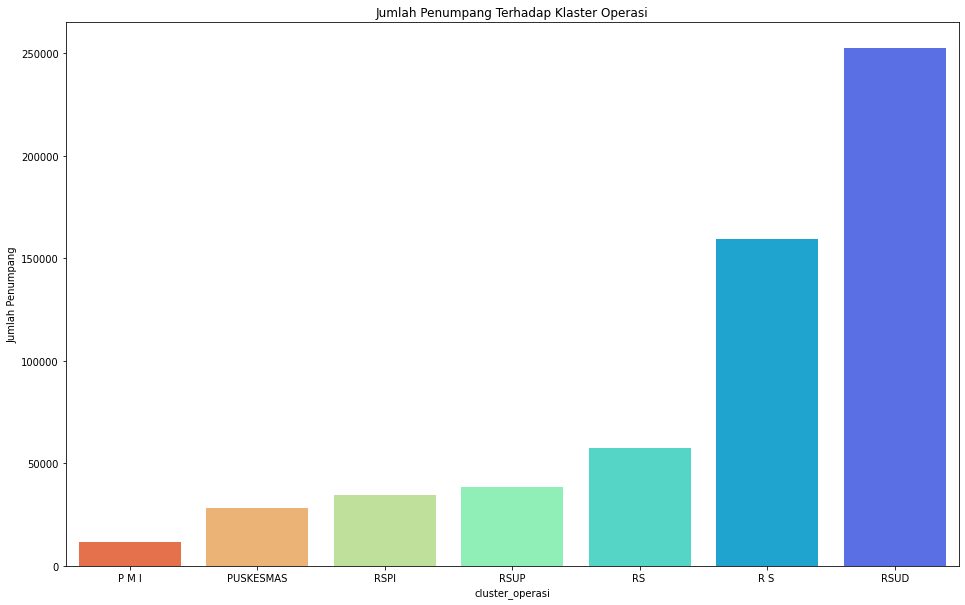

In [179]:
plt.figure(figsize=(16, 10))
sns.barplot(data=focused_operation2, x='cluster_operasi', y='jumlah_penumpang', palette='rainbow_r',
            order = focused_operation2.sort_values('jumlah_penumpang')['cluster_operasi'])
plt.ylabel('Jumlah Penumpang')
plt.title('Jumlah Penumpang Terhadap Klaster Operasi')

plt.show()


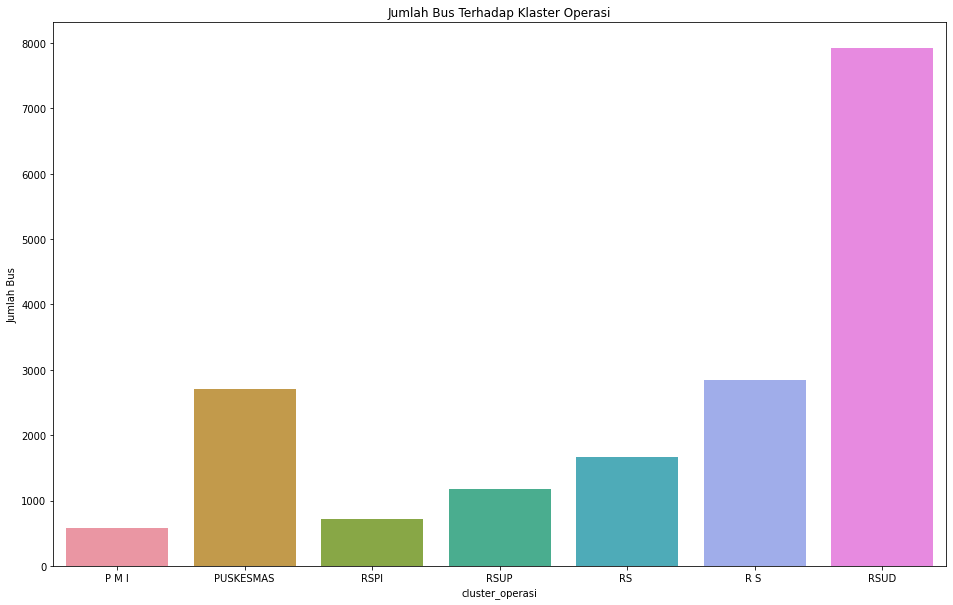

In [178]:
plt.figure(figsize=(16, 10))
sns.barplot(data=focused_operation2, x='cluster_operasi', y='jumlah_bus',
            order = focused_operation2.sort_values('jumlah_penumpang')['cluster_operasi'])
plt.ylabel('Jumlah Bus')
plt.title('Jumlah Bus Terhadap Klaster Operasi')
plt.show()

Dari 2 bar chart di atas, dapat dilihat bahwa jumlah Bus sangat mempengaruhi jumlah penumpang yang ditangani oleh masing-masing tipe operasi

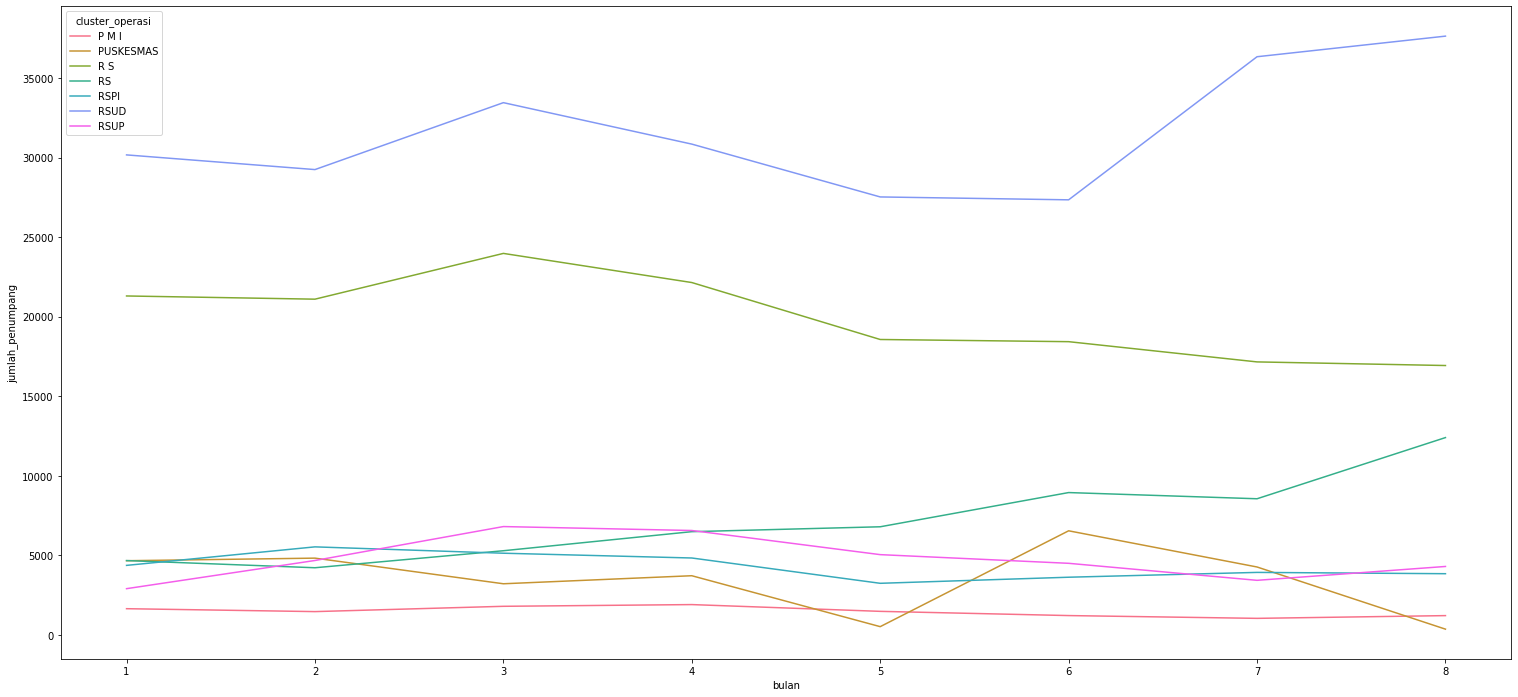

In [162]:
plt.figure(figsize=(26, 12))
sns.lineplot(data=focused_operation, x='bulan', y='jumlah_penumpang', hue ='cluster_operasi')
plt.show()

Setelah diteliti lebih lanjut, type-type operasi yang dilakukan berada di area-area yang berhubungan dengan penanganan covid-19 yang berarti berada di lokasi kesehatan. Menurut berita, pada tahun 2021 pemerintah pun mulai mengalokasikan penggunaan bus sekolah sebagai tranportasi untuk mengevakuasi pasien covid-19 [Link](https://statistik.jakarta.go.id/alih-fungsi-bus-sekolah-untuk-membantu-penanganan-covid-19-di-dki-jakarta/)

In [10]:
gb_df = dfs.groupby(['area_operasi', 'bulan'], as_index = False).agg({'jumlah_bus': 'sum',
                                                                             'jumlah_penumpang': 'sum'})

In [11]:
gb_df = gb_df[gb_df['jumlah_penumpang']  > 500]

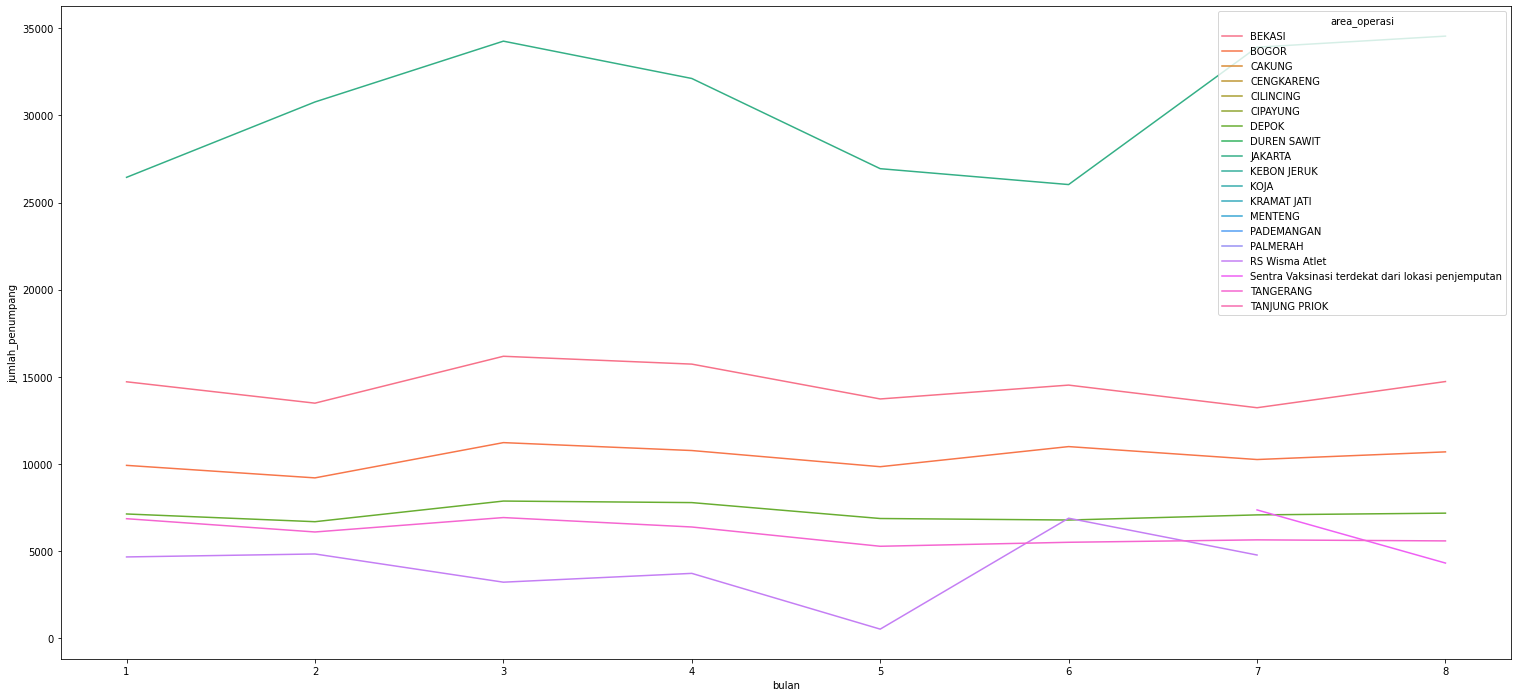

In [12]:
plt.figure(figsize=(26, 12))
sns.color_palette("bright")
sns.lineplot(data=gb_df, x='bulan', y='jumlah_penumpang', hue='area_operasi')
plt.show()

Dari line chart di atas, telah dicantum top 9 area operasi dengan jumlah penumpang covid-19 terbanyak. Juga terlihat bahwa daerah JAKARTA menduduki peringkat pertama dengan jumlah penumpang terbanyak, yang bisa dibilang jauh dari daerah-daerah lainnya

In [ ]:
gb_df2 = dfs.copy()
gb_df2['penumpang_per_bus'] = gb_df2['jumlah_penumpang'] / gb_df2['jumlah_bus']
gb_df2

,type_operasi,area_operasi,jumlah_bus,jumlah_penumpang,bulan,penumpang_per_bus
0,RSUD CENGKARENG,JAKARTA,125.0,5203.0,1,41.624000
2,RSUD CENGKARENG,DEPOK,30.0,692.0,1,23.066667
3,RSUD CENGKARENG,TANGERANG,70.0,1232.0,1,17.600000
4,RSUD CENGKARENG,BEKASI,24.0,233.0,1,9.708333
5,RSUD DUREN SAWIT,JAKARTA,95.0,4887.0,1,51.442105
...,...,...,...,...,...,...
278,RUTE ZONASI,ZONASI 9 (ROROTAN - MARUNDA),32.0,2.0,8,0.062500
279,RUTE ZONASI,ZONASI 10 (RUSUNAWA - CILINCING),2.0,2.0,8,1.000000
280,RUTE ZONASI,ZONASI 11 (RUSUN KAPUK MUARA - JEMBATAN LIMA -...,5.0,2.0,8,0.400000
281,RUTE ZONASI,ZONASI 12 (RUSUN RAWABEBEK - CAKUNG TIMUR - RO...,7.0,2.0,8,0.285714


In [ ]:
gb_df2 = gb_df2.groupby(['area_operasi', 'bulan'], as_index = False).agg({'penumpang_per_bus' : 'mean'})

In [ ]:
gb_df2

,area_operasi,bulan,penumpang_per_bus
0,BEKASI,1,25.433985
1,BEKASI,2,27.035309
2,BEKASI,3,28.895131
3,BEKASI,4,30.588326
4,BEKASI,5,28.899895
...,...,...,...
131,ZONASI 5 (PULOGADUNG - MARDANI - PASEBAN),8,0.166667
132,ZONASI 6 (CAWANG - RAGUNAN),8,0.142857
133,ZONASI 7 (RAWAMANGUN - MANGGARAI - CIKINI),8,0.250000
134,ZONASI 8 (LUBANG BUAYA - DUKU.5 (JASA MARGA) -...,8,inf


In [ ]:
x = gb_df2[gb_df2['penumpang_per_bus'] > gb_df2['penumpang_per_bus'].quantile(0.4)]

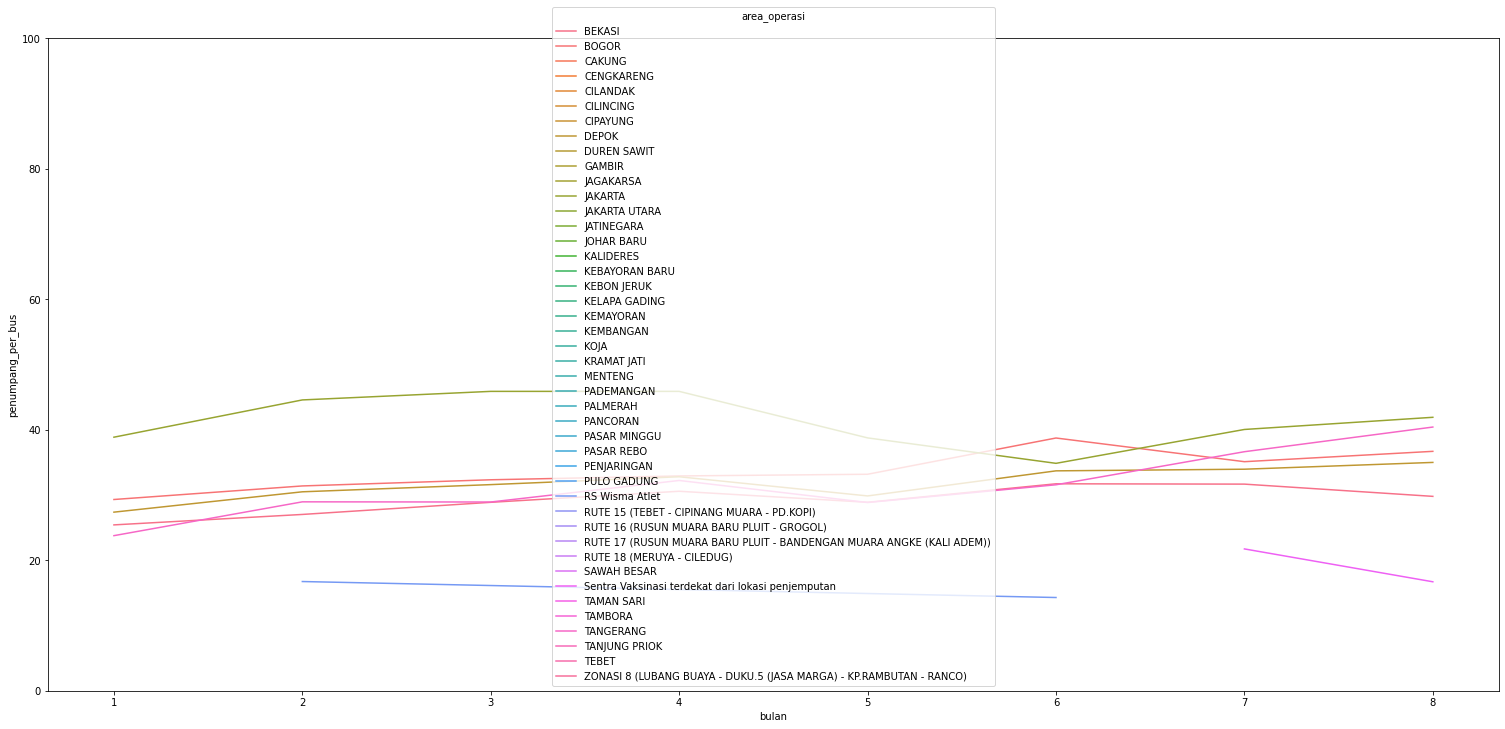

In [ ]:
plt.figure(figsize=(26, 12))
sns.color_palette("bright")
sns.lineplot(data=x, x='bulan', y='penumpang_per_bus', hue='area_operasi')
plt.ylim(0, 100)
plt.show()

Terbukti juga bahwa bus-bus sekolah di daerah Jakarta memiliki ratio penumpang/bus tertinggi, dimana memiliki rata-rata 30-50 penumpang per bulannya

Ini sesuai dengan data bahwa daerah Jakarta sampai sekarang masih merupakan daerah dengan kasus covid tertinggi per bulannya, namun mulai turun sejak bulan ke 6

In [ ]:
final_df = dfs.to_csv("bus_sekolah_master.csv")

In [ ]:
from google.colab import files
files.download('bus_sekolah_master.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>